# Regression Model

Objectives:
Understanding the dataset;
Data cleaning and data analysis;
Build models to predict
Explain the model.

## 1. Data Analysis & Cleaning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from math import sqrt
import sys
%matplotlib inline

import mlxtend
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge

import hyperopt
import catboost
from catboost import CatBoostRegressor
from catboost.utils import get_roc_curve
from catboost.utils import eval_metric
import  warnings
warnings.simplefilter('ignore')
import shap

In [2]:
pd.set_option("display.max_columns", None)
mpl.rcParams['figure.figsize'] = (12, 10)
#plt.rcParams['axes.labelsize'] = 15
font = {'weight' : 'bold', 'size'   : 15}
plt.rc('font', **font)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
data = pd.read_csv('real_estate_data.csv')
data.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


It is obvious that *'tx_price'* is the y_label we want to predict.

### 1.1 Understanding the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tx_price            1883 non-null   int64  
 1   beds                1883 non-null   int64  
 2   baths               1883 non-null   int64  
 3   sqft                1883 non-null   int64  
 4   year_built          1883 non-null   int64  
 5   lot_size            1883 non-null   int64  
 6   property_type       1883 non-null   object 
 7   exterior_walls      1660 non-null   object 
 8   roof                1529 non-null   object 
 9   basement            1657 non-null   float64
 10  restaurants         1883 non-null   int64  
 11  groceries           1883 non-null   int64  
 12  nightlife           1883 non-null   int64  
 13  cafes               1883 non-null   int64  
 14  shopping            1883 non-null   int64  
 15  arts_entertainment  1883 non-null   int64  
 16  beauty

In [5]:
data.isnull().sum()

tx_price                0
beds                    0
baths                   0
sqft                    0
year_built              0
lot_size                0
property_type           0
exterior_walls        223
roof                  354
basement              226
restaurants             0
groceries               0
nightlife               0
cafes                   0
shopping                0
arts_entertainment      0
beauty_spas             0
active_life             0
median_age              0
married                 0
college_grad            0
property_tax            0
insurance               0
median_school           0
num_schools             0
tx_year                 0
dtype: int64

In [6]:
data.shape

(1883, 26)

In [7]:
data.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


In [8]:
#change the type mrfei from object to float
#data['mrfei'] = data['mrfei'].astype(float, errors = 'raise')
#data['mrfei'] = pd.to_numeric(data['mrfei'],errors = 'coerce')

### 1.2 Understanding the numerical variables

In [9]:
col_num = data.select_dtypes(exclude = ['object']).columns.tolist()
col_num

['tx_price',
 'beds',
 'baths',
 'sqft',
 'year_built',
 'lot_size',
 'basement',
 'restaurants',
 'groceries',
 'nightlife',
 'cafes',
 'shopping',
 'arts_entertainment',
 'beauty_spas',
 'active_life',
 'median_age',
 'married',
 'college_grad',
 'property_tax',
 'insurance',
 'median_school',
 'num_schools',
 'tx_year']

array([[<AxesSubplot:title={'center':'tx_price'}>,
        <AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'baths'}>,
        <AxesSubplot:title={'center':'sqft'}>,
        <AxesSubplot:title={'center':'year_built'}>],
       [<AxesSubplot:title={'center':'lot_size'}>,
        <AxesSubplot:title={'center':'basement'}>,
        <AxesSubplot:title={'center':'restaurants'}>,
        <AxesSubplot:title={'center':'groceries'}>,
        <AxesSubplot:title={'center':'nightlife'}>],
       [<AxesSubplot:title={'center':'cafes'}>,
        <AxesSubplot:title={'center':'shopping'}>,
        <AxesSubplot:title={'center':'arts_entertainment'}>,
        <AxesSubplot:title={'center':'beauty_spas'}>,
        <AxesSubplot:title={'center':'active_life'}>],
       [<AxesSubplot:title={'center':'median_age'}>,
        <AxesSubplot:title={'center':'married'}>,
        <AxesSubplot:title={'center':'college_grad'}>,
        <AxesSubplot:title={'center':'property_tax'}>,
        <A

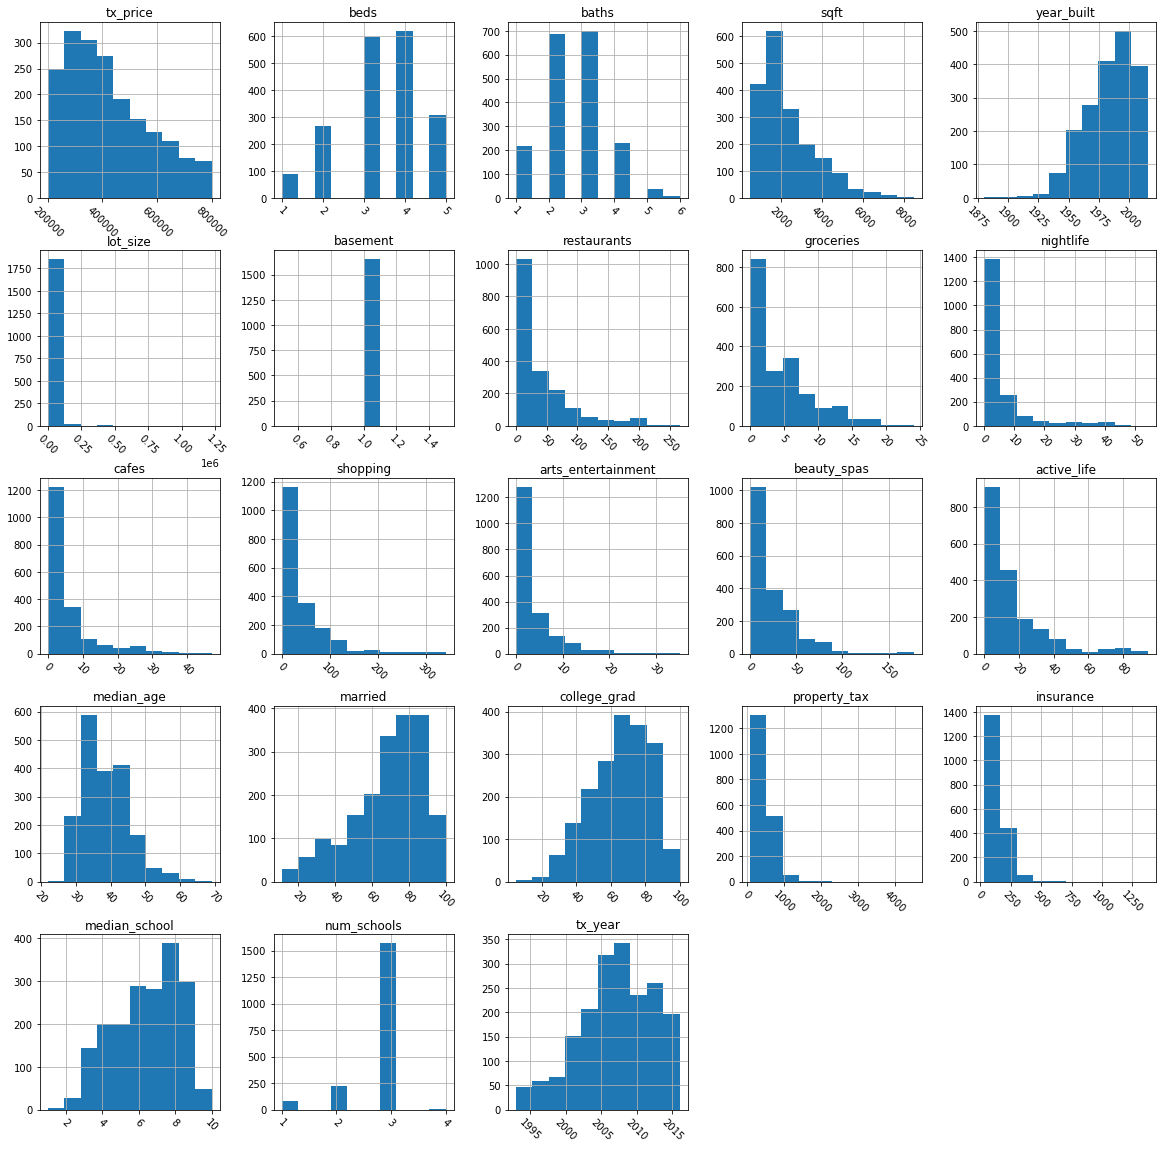

In [10]:
data.hist(figsize=(20,20), xrot=-45)

note: lot_size has outliers; will need to be investigated further.

#### Distribution of target variable(tx_price)

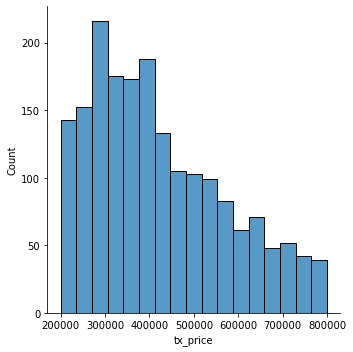

In [11]:
sns.displot(data, x="tx_price")

In [12]:
data.tx_price.median()

392000.0

#### Missing Values

In [13]:
data.select_dtypes(exclude=['object']).isnull().sum()

tx_price                0
beds                    0
baths                   0
sqft                    0
year_built              0
lot_size                0
basement              226
restaurants             0
groceries               0
nightlife               0
cafes                   0
shopping                0
arts_entertainment      0
beauty_spas             0
active_life             0
median_age              0
married                 0
college_grad            0
property_tax            0
insurance               0
median_school           0
num_schools             0
tx_year                 0
dtype: int64

A closer examination of the basement feature suggests that rows with basement=0 were encoded with NaN. Hence this is actually an incorrect labelling problem. We’ll need to convert NaN’s to 0 for the algorithms.
Note: If these NaN’s were genuine missing values, we should create an indicator variable basement_missing (with value 1 when basement=NaN) before converting the NaNs in basement to 0.

In [14]:
data['basement_missing'] = np.where(data['basement'].isna(), 1,0)
#df['hasimage'] = np.where(df['photos']!= '[]', True, False)
data.head(5)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,basement_missing
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,1
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,1
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,1
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,1


In [15]:
data.basement.fillna(0, inplace=True)
data.basement.unique() # No more NaN values!

array([0., 1.])

#### Outliers

In [16]:
#lot_size has some outliers
data['lot_size'].sort_values(ascending=False)

102     1220551
1111     436471
1832     436035
1876     436035
1839     435600
         ...   
285           0
286           0
287           0
288           0
0             0
Name: lot_size, Length: 1883, dtype: int64

Note regarding outliers: need to investigate the outlier from variable 'lot_size'
this one outlier will be removed for the further modeling

In [17]:
data = data[data['lot_size'] < 500000]

#### Correlation heatmap for all numerical features

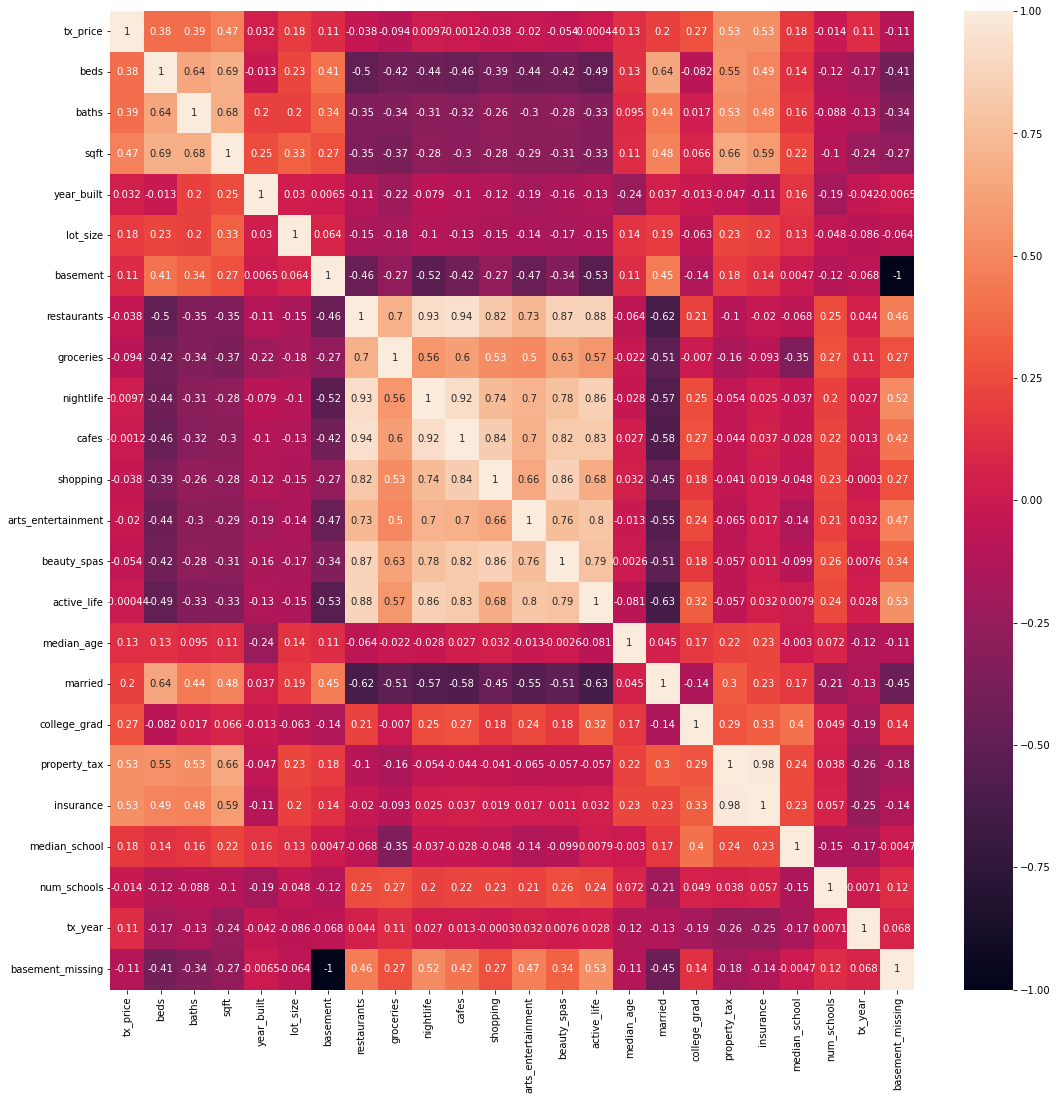

In [18]:
plt.figure(figsize=(18,18))
sns.heatmap(data.select_dtypes(['float64' , 'int64']).corr(),annot=True)
plt.show()

Several variables are highly correlated. For example, active_life, beauty_spas, cafe, nightlife and restaurants are all highly correlated. This multicollinearity might affect model performance, as regression features should be independent.

In [19]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates().dropna()
    return xFlattened

corrFilter(data, .7)

basement     basement_missing     -1.000000
groceries    restaurants           0.701522
nightlife    arts_entertainment    0.703782
restaurants  arts_entertainment    0.728020
shopping     nightlife             0.743431
beauty_spas  arts_entertainment    0.758724
             nightlife             0.777402
active_life  beauty_spas           0.785949
             arts_entertainment    0.800959
shopping     restaurants           0.818876
beauty_spas  cafes                 0.822546
active_life  cafes                 0.826934
cafes        shopping              0.837092
nightlife    active_life           0.858935
beauty_spas  shopping              0.861119
             restaurants           0.867817
restaurants  active_life           0.882038
cafes        nightlife             0.923921
nightlife    restaurants           0.926673
cafes        restaurants           0.937615
insurance    property_tax          0.984725
dtype: float64

For linear models, several variables need to be removed from the feature list: ['TractWhite','OHU2010','TractOMultir','TractWhite','HUNVFlag','TractKids','TractSeniors','NUMGQTRS','GroupQuartersFlag','TractSNAP']

In [20]:
corr = data.corr()[['tx_price']].sort_values(by='tx_price', ascending=False)
corr

,tx_price
tx_price,1.000000
property_tax,0.534935
insurance,0.532767
sqft,0.469316
baths,0.388978
beds,0.383695
college_grad,0.269338
married,0.199902
lot_size,0.181893
median_school,0.175684


### 1.3 Understanding the categorical variables

In [21]:
col_cat = data.select_dtypes(include = ['object']).columns.tolist()
col_cat

['property_type', 'exterior_walls', 'roof']

In [22]:
#encoding categorical variables
#le = LabelEncoder()
#le.fit(data['property_type'])
#data['property_type'] = le.transform(data['property_type'])
#data

#### Missing values

In [23]:
data.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

We’ll want to tell our algorithms that these values are Missing. This is more instructive than simply removing the rows.

In [24]:
for feat in col_cat:
    data[feat].fillna('Missing',inplace=True)

In [25]:
# Number of unique values
# Show the first 5 unique values

for column in col_cat:
    uniques = sorted(data[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

property_type            2	 ['Apartment / Condo / Townhouse', 'Single-Family']
exterior_walls          17	 ['Asbestos shingle', 'Block', 'Brick', 'Brick veneer', 'Combination']
roof                    17	 ['Asbestos', 'Asphalt', 'Built-up', 'Composition', 'Composition Shingle']


In [26]:
#data = data.drop(columns=['roof', 'exterior_walls'])

In [27]:
data.property_type.value_counts()

Single-Family                    1080
Apartment / Condo / Townhouse     802
Name: property_type, dtype: int64

In [28]:
data.exterior_walls.value_counts()

Brick                  686
Siding (Alum/Vinyl)    503
Missing                223
Metal                  120
Combination            107
Wood                    72
Wood Siding             49
Brick veneer            48
Stucco                  26
Other                   10
Concrete                 8
Block                    7
Concrete Block           7
Asbestos shingle         6
Rock, Stone              5
Masonry                  3
Wood Shingle             2
Name: exterior_walls, dtype: int64

In [29]:
data.roof.value_counts()

Composition Shingle      1179
Missing                   353
Asphalt                   132
Shake Shingle              55
Other                      49
Gravel/Rock                30
Wood Shake/ Shingles       30
Roll Composition           12
Slate                       9
Asbestos                    9
asphalt                     5
Composition                 5
Metal                       4
composition                 4
shake-shingle               3
Built-up                    2
asphalt,shake-shingle       1
Name: roof, dtype: int64

From this, we can clean up the classes a bit. We’ll

merge together sparse classes (those with too few observations)
merge classes with similar meanings (e.g. subsume Concrete and Block into the more general Concrete block class.
fix up labelling errors (e.g. concrete should be Concrete).

In [30]:
data.exterior_walls.replace(['Wood Siding', 'Wood Shingle', 'Wood'],
                           'Wood', inplace=True)
data.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)
data.exterior_walls.replace(['Concrete','Block'], 'Concrete Block',
                            inplace=True)
data.exterior_walls.replace(['Concrete Block', 'Stucco', 'Concrete',
                           'Block', 'Masonry', 'Other', 
                           'Asbestos shingle', 'Rock, Stone'],
                           'Other', inplace=True)
data.roof.replace('composition', 'Composition',inplace=True)
data.roof.replace(['Composition', 'Wood Shake/ Shingles', 
                 'Composition Shingle'], 'Composition Shingle',
                  inplace=True)
data.roof.replace(['Other', 'Gravel/Rock', 'Roll Composition',
                 'Slate', 'Built-up', 'Asbestos', 'Metal'], 'Other',
                  inplace=True)
data.roof.replace(['asphalt','asphalt,shake-shingle',
                 'shake-shingle'], 'Shake Shingle', inplace=True)



Let’s plot some bar graphs of our three categorical features.

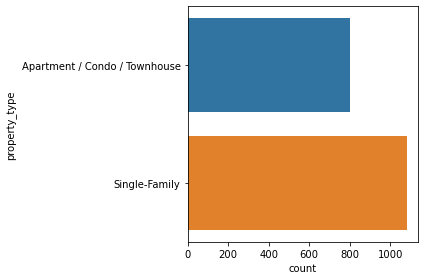

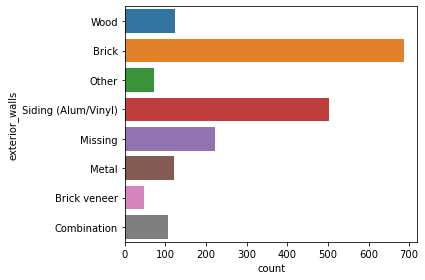

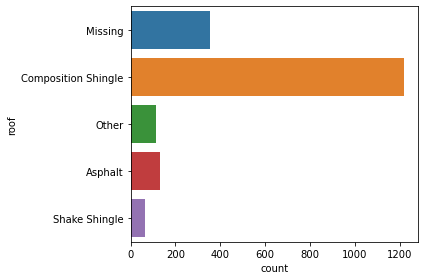

In [31]:
for feat in col_cat:
    sns.countplot(y=feat, data=data)
    plt.tight_layout()
    plt.show()

Note: now we have finished the data cleaning stage (processing the missing values and outliers)

In [32]:
#save a copy of data for ensemble modeling
data_ensemble = data

#### Further EDA
Segmentations combine both numerical and categorical features.

Let’s segment all our categorical variables (property_type, exterior_walls and roof) by our target tx_price. This will provide a detailed look at what might drive property values.

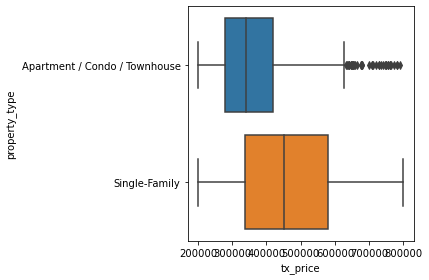

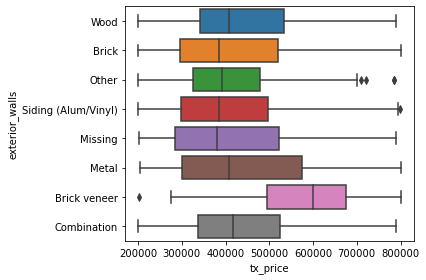

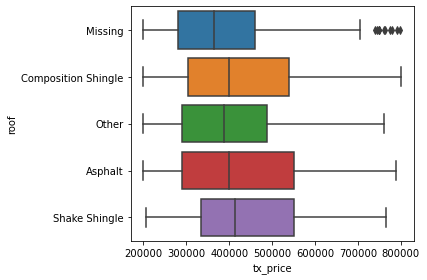

In [33]:
for feat in col_cat:
    sns.boxplot(data=data, x = 'tx_price', y = '{}'.format(feat))
    plt.tight_layout()
    plt.show()

Let’s also look at how property and neighbourhood features differ between single-family homes and apartment/condo/townhouse by using a groupby.

In [34]:
data.groupby('property_type').agg(['mean','median'])

tx_price                beds         \
                                        mean    median      mean median   
property_type                                                             
Apartment / Condo / Townhouse  366705.824190  340000.0  2.602244    3.0   
Single-Family                  464644.711111  450000.0  4.029630    4.0   

                                  baths                sqft          \
                                   mean median         mean  median   
property_type                                                         
Apartment / Condo / Townhouse  2.201995    2.0  1514.523691  1428.0   
Single-Family                  2.862037    3.0  2935.865741  2663.0   

                                year_built              lot_size           \
                                      mean  median          mean   median   
property_type                                                               
Apartment / Condo / Townhouse  1988.985037  1991.0   2427.273067   1424.0   
Single-Family                  1978.523148  1980.0  20417.666667  10758.5   

                               basement        restaurants        groceries  \
                                   mean median        mean median      mean   
property_type                                                                 
Apartment / Condo / Townhouse  0.784289    1.0   58.412718   42.0  5.912718   
Single-Family                  0.951852    1.0   26.672222   14.0  3.453704   

                                     nightlife            cafes         \
                              median      mean median      mean median   
property_type                                                            
Apartment / Condo / Townhouse    5.0  7.851621    4.0  8.037406    5.0   
Single-Family                    2.0  3.007407    1.0  3.308333    1.0   

                                shopping        arts_entertainment         \
                                    mean median               mean median   
property_type                                                               
Apartment / Condo / Townhouse  57.654613   36.0           4.824190    3.0   
Single-Family                  28.289815   13.0           2.318519    1.0   

                              beauty_spas        active_life         \
                                     mean median        mean median   
property_type                                                         
Apartment / Condo / Townhouse   32.074813   26.0   22.384040   14.0   
Single-Family                   16.970370    9.0   10.946296    7.0   

                              median_age           married         \
                                    mean median       mean median   
property_type                                                       
Apartment / Condo / Townhouse  37.204489   35.5  57.562344   62.0   
Single-Family                  39.643519   40.0  77.685185   80.0   

                              college_grad        property_tax         \
                                      mean median         mean median   
property_type                                                           
Apartment / Condo / Townhouse    66.346633   69.0   346.406484  321.0   
Single-Family                    64.128704   65.0   556.383333  516.0   

                                insurance        median_school         \
                                     mean median          mean median   
property_type                                                           
Apartment / Condo / Townhouse  105.685786   96.0      6.382793    7.0   
Single-Family                  166.329630  152.5      6.592593    7.0   

                              num_schools             tx_year          \
                                     mean median         mean  median   
property_type                                                           
Apartment / Condo / Townhouse    2.831671    3.0  2007.933915  2008.0   
Single-Family                    2.7648

In summary, single-family houses are more expensive and larger, while apartment/condo/townhouse dwellings are closer to entertainment/shops and attract younger residents. 

## 2.Feature Engineering

A lot of feature engineering rests on domain expertise.

* One important missing feature is the age of the property!
* Which is simply: *tx_year - year_built*

In [35]:
data.year_built.sort_values().unique()

array([1880, 1892, 1900, 1905, 1918, 1920, 1921, 1924, 1925, 1927, 1929,
       1930, 1932, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])

In [36]:
data['age'] = data['tx_year'] - data['year_built']

In [37]:
data.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,basement_missing,age
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,1,0
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,41
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,1,49
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,1,5
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,1,10


In [38]:
data.age.sort_values().unique()

array([ -8,  -7,  -4,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,
         8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,
        21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  77,  78,  79,  80,  82,  85,  86,  89,  90,  94,
       101, 103, 104, 110, 113, 114])

In [39]:
data.iloc[:,4::19].sort_values(by='year_built', ascending=False)[:10]

,year_built,median_school
1540,2015,9.0
1864,2015,5.0
1828,2015,4.0
1840,2014,10.0
1769,2014,4.5
1207,2014,8.0
0,2013,9.0
1088,2013,6.0
864,2013,4.0
406,2013,3.5


Some properties are sold before it finished construction.

That is why we have negative *age* values.

In [40]:
data.to_csv('data_processed.csv', index=False) # Now, output to cleaned & engineered data for use

## 3. Modeling
### 3.1. Baseline model-- regularized linear regression

#### Data preparation for linear regression

In [41]:
df = pd.read_csv('data_processed.csv')

In [42]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,basement_missing,age
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,1,0
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,41
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,1,49
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,1,5
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,1,10


In [43]:
#drop highly correlate features
df = df.drop(columns=['active_life', 'beauty_spas', 'cafes', 'nightlife'], axis =1)

In [44]:
#one-hot encoding the categorical features
df = pd.get_dummies(df, columns = ['exterior_walls', 
                                   'roof', 
                                   'property_type'])

In [45]:
y = df.tx_price
X = df.drop('tx_price', axis=1)

In [46]:
#test_train splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#### L1 and L2 regularized linear models

In [47]:
#we use L1 and L2 regularized linear models;
#L1 lasso many coefficients are zeroed out and leads to sparser models;
#feature normalization also happen within the pipeline
pipelines = {
    'lasso' : make_pipeline(StandardScaler(),
              Lasso(random_state=123, tol=1e-2, max_iter=10000)),
    'ridge' : make_pipeline(StandardScaler(),
              Ridge(random_state=123,  tol=1e-2, max_iter=10000))
}

In [48]:
#lasso：the higher the alpha, the most feature coefficients are zero.
#ridge: the higher the alpha, the impact of coefficient shrinkage grows 
lasso_hyperparameters = {
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
ridge_hyperparameters = {
    'ridge__alpha' : [0.001, 0.005, 0.01, 0.1, 0.5, 1, 5, 10]}

hyperparameters = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters   
}

In [49]:
fitted_models = {}
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, 
                         hyperparameters[name], 
                         cv=10
                         )
    model.fit(X_train, y_train)
    fitted_models[name] = model

In [50]:
#give R2 as the performance score
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.4092652420414395
ridge 0.41274254448138564


In [51]:
#apply model to test data
#use R2 and MAE as the metrics: mae measures the average of the residuals. mse measures the variance of the residuals
#adding more features always increase the r2, can serve as a signal for high model complexity (overfitting)
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print(name)
    print(' — — — —' )
    print('R²:', r2_score(y_test, pred))
    print('MAE:', mean_absolute_error(y_test, pred))
    print()

lasso
 — — — —
R²: 0.4176376889468161
MAE: 88262.15999118793

ridge
 — — — —
R²: 0.41707710655944186
MAE: 88341.5254655491



### 3.2 Ensemble model -- Catboosting model

In [52]:
y1 = data_ensemble['tx_price']
X1 = data_ensemble.drop('tx_price', axis=1)

# train-test splitting
X_train_ens, X_test_ens, y_train_ens, y_test_ens = train_test_split(X1, y1, test_size=0.20,  random_state=42)
categorical_columns_names = list(X1.select_dtypes(include=['object']).columns.values.tolist())
categorical_columns = [X1.columns.get_loc(c) for c in categorical_columns_names]
categorical_columns

[5, 6, 7]

In [53]:
cb = CatBoostRegressor()
cb.fit(X_train_ens, y_train_ens,cat_features=categorical_columns)


Learning rate set to 0.041976
0:	learn: 145627.3427191	total: 52.6ms	remaining: 52.6s
1:	learn: 142156.2995424	total: 67ms	remaining: 33.4s
2:	learn: 138676.4608976	total: 70.7ms	remaining: 23.5s
3:	learn: 135393.7012894	total: 76.2ms	remaining: 19s
4:	learn: 132278.1549751	total: 79.1ms	remaining: 15.7s
5:	learn: 129654.6656709	total: 87.7ms	remaining: 14.5s
6:	learn: 126643.3322758	total: 93.9ms	remaining: 13.3s
7:	learn: 124162.1780298	total: 101ms	remaining: 12.5s
8:	learn: 121598.7044733	total: 106ms	remaining: 11.6s
9:	learn: 119144.0269805	total: 111ms	remaining: 10.9s
10:	learn: 116837.6686747	total: 115ms	remaining: 10.3s
11:	learn: 114650.1989139	total: 118ms	remaining: 9.74s
12:	learn: 112267.2121129	total: 127ms	remaining: 9.63s
13:	learn: 110186.5348938	total: 130ms	remaining: 9.14s
14:	learn: 108657.9830252	total: 131ms	remaining: 8.63s
15:	learn: 106958.8147793	total: 134ms	remaining: 8.26s
16:	learn: 105329.1329657	total: 137ms	remaining: 7.91s
17:	learn: 103602.5560000

153:	learn: 56506.5558563	total: 901ms	remaining: 4.95s
154:	learn: 56478.4776866	total: 904ms	remaining: 4.93s
155:	learn: 56423.5122294	total: 917ms	remaining: 4.96s
156:	learn: 56319.6802245	total: 929ms	remaining: 4.99s
157:	learn: 56269.2551969	total: 933ms	remaining: 4.97s
158:	learn: 56168.8711419	total: 935ms	remaining: 4.95s
159:	learn: 56092.8129449	total: 938ms	remaining: 4.92s
160:	learn: 56007.5941184	total: 942ms	remaining: 4.91s
161:	learn: 55866.4417709	total: 945ms	remaining: 4.89s
162:	learn: 55727.9088199	total: 949ms	remaining: 4.87s
163:	learn: 55663.2870439	total: 952ms	remaining: 4.86s
164:	learn: 55536.4701259	total: 955ms	remaining: 4.83s
165:	learn: 55484.4819402	total: 964ms	remaining: 4.84s
166:	learn: 55444.4498895	total: 967ms	remaining: 4.82s
167:	learn: 55357.1486461	total: 969ms	remaining: 4.8s
168:	learn: 55208.1343012	total: 971ms	remaining: 4.78s
169:	learn: 55119.2597958	total: 974ms	remaining: 4.76s
170:	learn: 55031.3821465	total: 986ms	remaining:

306:	learn: 45740.8933245	total: 1.62s	remaining: 3.66s
307:	learn: 45661.7216442	total: 1.62s	remaining: 3.65s
308:	learn: 45631.2462273	total: 1.63s	remaining: 3.64s
309:	learn: 45620.3687763	total: 1.63s	remaining: 3.63s
310:	learn: 45613.1242009	total: 1.64s	remaining: 3.63s
311:	learn: 45523.9101226	total: 1.64s	remaining: 3.62s
312:	learn: 45504.1703315	total: 1.64s	remaining: 3.61s
313:	learn: 45460.8014041	total: 1.65s	remaining: 3.6s
314:	learn: 45403.5628373	total: 1.65s	remaining: 3.58s
315:	learn: 45396.0976835	total: 1.65s	remaining: 3.57s
316:	learn: 45325.8365897	total: 1.65s	remaining: 3.56s
317:	learn: 45230.2130962	total: 1.66s	remaining: 3.57s
318:	learn: 45157.6293704	total: 1.67s	remaining: 3.56s
319:	learn: 45136.4974319	total: 1.68s	remaining: 3.56s
320:	learn: 45086.2751660	total: 1.68s	remaining: 3.55s
321:	learn: 45039.4900107	total: 1.68s	remaining: 3.54s
322:	learn: 44984.0561378	total: 1.69s	remaining: 3.54s
323:	learn: 44922.2466974	total: 1.71s	remaining:

456:	learn: 39316.0979017	total: 2.31s	remaining: 2.74s
457:	learn: 39236.7376288	total: 2.32s	remaining: 2.74s
458:	learn: 39209.5632975	total: 2.32s	remaining: 2.74s
459:	learn: 39194.0701230	total: 2.34s	remaining: 2.75s
460:	learn: 39152.1240391	total: 2.34s	remaining: 2.74s
461:	learn: 39113.4391814	total: 2.34s	remaining: 2.73s
462:	learn: 39096.6205381	total: 2.35s	remaining: 2.72s
463:	learn: 39056.4752169	total: 2.35s	remaining: 2.71s
464:	learn: 39015.0841442	total: 2.35s	remaining: 2.71s
465:	learn: 38975.0473281	total: 2.37s	remaining: 2.71s
466:	learn: 38967.8451049	total: 2.37s	remaining: 2.71s
467:	learn: 38932.8255300	total: 2.38s	remaining: 2.71s
468:	learn: 38930.6668027	total: 2.39s	remaining: 2.7s
469:	learn: 38884.9944875	total: 2.39s	remaining: 2.69s
470:	learn: 38831.5134365	total: 2.39s	remaining: 2.69s
471:	learn: 38781.6505915	total: 2.4s	remaining: 2.68s
472:	learn: 38742.4568223	total: 2.4s	remaining: 2.68s
473:	learn: 38668.0587596	total: 2.42s	remaining: 2

617:	learn: 33961.0616620	total: 3.1s	remaining: 1.92s
618:	learn: 33945.0501255	total: 3.1s	remaining: 1.91s
619:	learn: 33909.0530195	total: 3.11s	remaining: 1.91s
620:	learn: 33867.2952562	total: 3.11s	remaining: 1.9s
621:	learn: 33863.2496778	total: 3.12s	remaining: 1.89s
622:	learn: 33844.1966916	total: 3.12s	remaining: 1.89s
623:	learn: 33811.9456223	total: 3.12s	remaining: 1.88s
624:	learn: 33755.1235824	total: 3.13s	remaining: 1.88s
625:	learn: 33748.7938697	total: 3.13s	remaining: 1.87s
626:	learn: 33725.7058344	total: 3.13s	remaining: 1.86s
627:	learn: 33691.4678131	total: 3.13s	remaining: 1.86s
628:	learn: 33659.2527150	total: 3.14s	remaining: 1.85s
629:	learn: 33638.7044569	total: 3.14s	remaining: 1.84s
630:	learn: 33635.5269069	total: 3.15s	remaining: 1.84s
631:	learn: 33626.4733742	total: 3.15s	remaining: 1.84s
632:	learn: 33598.0616070	total: 3.16s	remaining: 1.83s
633:	learn: 33553.9599743	total: 3.17s	remaining: 1.83s
634:	learn: 33523.4497003	total: 3.17s	remaining: 1

769:	learn: 30196.6087244	total: 3.84s	remaining: 1.15s
770:	learn: 30182.7366399	total: 3.84s	remaining: 1.14s
771:	learn: 30135.5581361	total: 3.85s	remaining: 1.14s
772:	learn: 30104.7503589	total: 3.86s	remaining: 1.13s
773:	learn: 30074.7263015	total: 3.86s	remaining: 1.13s
774:	learn: 30043.8735875	total: 3.86s	remaining: 1.12s
775:	learn: 30028.4582189	total: 3.87s	remaining: 1.11s
776:	learn: 30013.8222127	total: 3.88s	remaining: 1.11s
777:	learn: 29999.6339507	total: 3.88s	remaining: 1.11s
778:	learn: 29977.9300819	total: 3.88s	remaining: 1.1s
779:	learn: 29950.4797307	total: 3.88s	remaining: 1.09s
780:	learn: 29946.3455592	total: 3.89s	remaining: 1.09s
781:	learn: 29927.6302888	total: 3.89s	remaining: 1.08s
782:	learn: 29893.9560643	total: 3.9s	remaining: 1.08s
783:	learn: 29850.2785838	total: 3.9s	remaining: 1.08s
784:	learn: 29842.1968170	total: 3.91s	remaining: 1.07s
785:	learn: 29817.8114174	total: 3.91s	remaining: 1.06s
786:	learn: 29788.8919149	total: 3.92s	remaining: 1

918:	learn: 27242.3517406	total: 4.58s	remaining: 403ms
919:	learn: 27235.7040537	total: 4.58s	remaining: 399ms
920:	learn: 27219.2655748	total: 4.59s	remaining: 394ms
921:	learn: 27194.6699474	total: 4.59s	remaining: 389ms
922:	learn: 27165.8810402	total: 4.6s	remaining: 384ms
923:	learn: 27149.3540331	total: 4.61s	remaining: 379ms
924:	learn: 27140.3863376	total: 4.61s	remaining: 374ms
925:	learn: 27106.1652589	total: 4.61s	remaining: 369ms
926:	learn: 27090.2736334	total: 4.62s	remaining: 363ms
927:	learn: 27059.3199150	total: 4.62s	remaining: 358ms
928:	learn: 27037.8725120	total: 4.62s	remaining: 353ms
929:	learn: 27017.5511415	total: 4.63s	remaining: 348ms
930:	learn: 26995.1730805	total: 4.63s	remaining: 343ms
931:	learn: 26976.3056150	total: 4.63s	remaining: 338ms
932:	learn: 26940.6211027	total: 4.64s	remaining: 333ms
933:	learn: 26904.8705786	total: 4.64s	remaining: 328ms
934:	learn: 26900.0255628	total: 4.65s	remaining: 323ms
935:	learn: 26878.9556398	total: 4.66s	remaining:

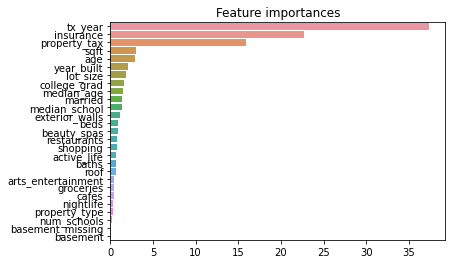

In [54]:
importances = cb.feature_importances_
cb_importances = pd.Series(importances, index=X_train_ens.columns).sort_values(ascending=False)

ax = sns.barplot(y=cb_importances.index, x = cb_importances.values).set(title='Feature importances')
plt.show()


In [55]:
predictions = cb.predict(X_test_ens)

In [56]:
mean_absolute_error(y_test_ens, predictions)

44043.667847221004

Catboost's default setting is already giving the lowest MAE amongst other models!

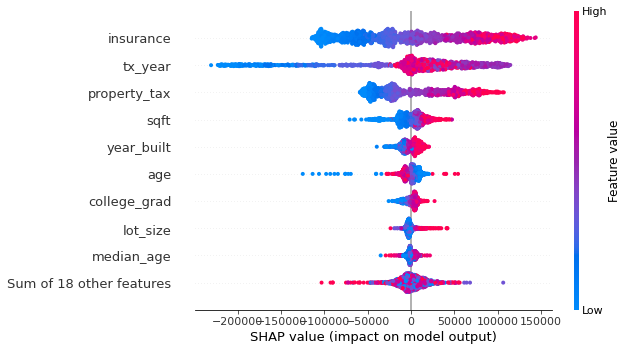

In [57]:
#get shap values
explainer = shap.Explainer(cb)
shap_values = explainer(X_train_ens)
shap.plots.beeswarm(shap_values)

## 4.Results

#### 3 different models are tested with MAE:
* Lasso (tuned): 46052
* Ridge (tuned): 45025
* Catboost (default): 43525


Next Step: Tuning parameters of Catboosting model, such as learning_rate, depth, l2_leaf_reg, etc.
There is no overfitting on the last iterations of training (the training does not converge) — increase the learning rate.
Overfitting is detected — decrease the learning rate
Values in the range from 6 to 10 are recommended.
coefficient at the L2 regularization term of the cost function.  2 and 30, is a good starting point.